In [1]:
# Import required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime


In [2]:
# Import Data

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [28]:
# Standardise column names

new_col_names = [x.lower() for x in list(train.columns)]
train.columns = new_col_names

In [29]:
# View Data info

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    10506 non-null  object 
 1   address                 10506 non-null  object 
 2   species                 10506 non-null  object 
 3   block                   10506 non-null  int64  
 4   street                  10506 non-null  object 
 5   trap                    10506 non-null  object 
 6   addressnumberandstreet  10506 non-null  object 
 7   latitude                10506 non-null  float64
 8   longitude               10506 non-null  float64
 9   addressaccuracy         10506 non-null  int64  
 10  nummosquitos            10506 non-null  int64  
 11  wnvpresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [30]:
# train data manipulation

# train.rename(columns={'date': 'date_col'}, inplace=True)
train.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


**Data Exploration**

<AxesSubplot:>

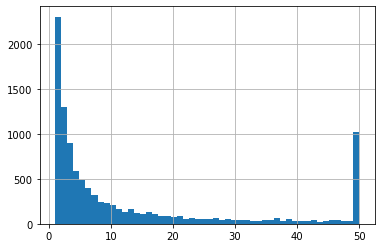

In [31]:
# Distribution of mosquitos found

train['nummosquitos'].hist(bins=50) # Ceiling at 50 is reflective of how the data is entered

These test results are organized in such a way that when the number of mosquitos exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitos are capped at 50. 

If the mosquito traps are only inspected ONCE a day, will only expect more than one entry for the specific location/trap/date if one of the entry has 50 mosquitos 

In [32]:
print(train.shape)
# train.groupby(list(train.columns))[list(train.columns)].mean().shape

(10506, 12)


In [33]:
# Create a list of columns without 'nummosquitos'

col_w = list(train.columns)
col_w.remove('nummosquitos') # this includes all the column names except for 'nummosquitos'
#col_w

In [34]:
# Inspect dulplicated rows where number of mosquito count is less than 50

mos_u50 = train.loc[train['nummosquitos']<50,:] # slice data for nummosquitos < 50

edup = mos_u50.duplicated(keep=False)       # find index of data which are exact duplicates
dup = mos_u50[col_w].duplicated(keep=False) # find index of data which have same are duplicates except 'nummosquitos'

In [35]:
print(mos_u50[edup].shape)
print(mos_u50[dup].shape)

(208, 12)
(1537, 12)


In [36]:
# View some data which are duplicates except 'nummosquitos'

mos_u50[dup][:6] 

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
98,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
99,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
280,2007-07-11,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
281,2007-07-11,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,2,0
294,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,35,0
296,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,8,0


There are entries that have the same date, location, trap with different number of mosquitos.

This could mean that the data is not entered as we expect, there are data entry errors, traps are checked more than once a day or others. As we are unable to discern duplicates/errors from True values, we will assume that ALL ENTRIES ARE VALID.

In [37]:
# base rate of wnvpresent BEFORE transformation

train['wnvpresent'].value_counts(normalize=True)

0    0.947554
1    0.052446
Name: wnvpresent, dtype: float64

In [38]:
# To merge rows if they have the same date, location, trap
# Create new column to identify those with wnv

col_w.remove('wnvpresent') # ie all columns except wnvpresent and nummosquitos

train_1 = train.groupby(col_w).sum()
train_1.reset_index(inplace=True)

In [39]:
# Create a new column for to indicate if it has wnv

train_1['wnv_binary'] = train_1['wnvpresent'].map(lambda x: 1 if x > 0 else 0)
train_1[['wnvpresent', 'wnv_binary']].groupby('wnvpresent').sum()

,wnv_binary
wnvpresent,
0,0
1,409
2,31
3,9
4,2
5,1
6,1
7,1
8,1


In [40]:
# Rename column names to the appropriate one

train_1.rename(columns={'wnvpresent': 'wnvcount',
                       'wnv_binary': 'wnvpresent'}, inplace=True)

In [41]:
# to check if lablled correctly
train_1[['wnvcount', 'wnvpresent']].groupby('wnvpresent').sum()

,wnvcount
wnvpresent,
0,0
1,551


In [42]:
# base rate of wnvpresent AFTER transformation

train_1['wnvpresent'].value_counts(normalize=True)

0    0.946077
1    0.053923
Name: wnvpresent, dtype: float64

In [43]:
train_1.describe()

,block,latitude,longitude,addressaccuracy,nummosquitos,wnvcount,wnvpresent
count,8475.000000,8475.000000,8475.000000,8475.000000,8475.000000,8475.000000,8475.000000
mean,38.949381,41.844618,-87.694788,7.941239,15.933805,0.065015,0.053923
std,24.117693,0.106609,0.084063,1.321681,75.084707,0.337489,0.225880
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000,0.000000
25%,14.000000,41.750498,-87.752329,8.000000,2.000000,0.000000,0.000000
50%,37.000000,41.857402,-87.694991,8.000000,4.000000,0.000000,0.000000
75%,58.000000,41.944869,-87.642984,9.000000,11.000000,0.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,2532.000000,10.000000,1.000000


In [44]:
train_1['date'] = pd.to_datetime(train_1['date'])
train_1['date_col'] = train_1['date']

# Set Date to be in the index

train_1.set_index('date', inplace=True)

In [45]:
train_1

,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvcount,wnvpresent,date_col
date,,,,,,,,,,,,,
2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0,0,2007-05-29
2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0,0,2007-05-29
2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,11,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8,1,0,0,2007-05-29
2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0,0,2007-05-29
2007-05-29,"1500 North Long Avenue, Chicago, IL 60651, USA",CULEX RESTUANS,15,N LONG AVE,T153,"1500 N LONG AVE, Chicago, IL",41.907645,-87.760886,8,1,0,0,2007-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-09-26,"South Stony Island Avenue, Chicago, IL, USA",CULEX PIPIENS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,6,0,0,2013-09-26
2013-09-26,"South Stony Island Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,4,0,0,2013-09-26
2013-09-26,"South Vincennes Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,10,S VINCENNES,T089,"1000 S VINCENNES, Chicago, IL",41.723195,-87.649970,5,4,0,0,2013-09-26


In [46]:
train_1.isnull().sum()

address                   0
species                   0
block                     0
street                    0
trap                      0
addressnumberandstreet    0
latitude                  0
longitude                 0
addressaccuracy           0
nummosquitos              0
wnvcount                  0
wnvpresent                0
date_col                  0
dtype: int64

In [48]:
train_1.loc['2011-07'].resample('W').mean()

,block,latitude,longitude,addressaccuracy,nummosquitos,wnvcount,wnvpresent
date,,,,,,,
2011-07-17,37.501887,41.849773,-87.695882,7.867925,17.313208,0.000000,0.000000
2011-07-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-31,37.613636,41.845859,-87.701689,7.939394,14.609848,0.041667,0.037879


Text(0.5, 1.0, 'Percentage of traps with WNV by year')

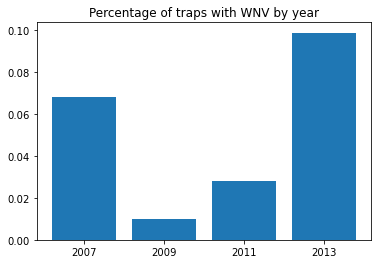

In [49]:
#train_1.resample('Y').mean()['wnvpresent'].plot.bar()
plt.bar(['2007', '2009', '2011', '2013'],train_1.resample('Y').mean().dropna()['wnvpresent'])
plt.title('Percentage of traps with WNV by year')
#train_1.resample('Y').mean().dropna()['wnvpresent']

Text(0, 0.5, 'Month')

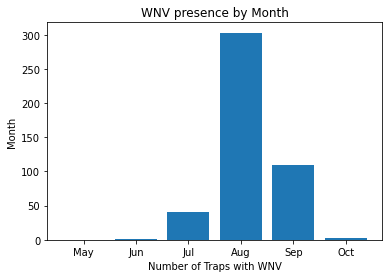

In [5]:
#df[df['Date'].dt.month == 11]
plt.bar(['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'],
        train_1.groupby(train_1['date_col'].dt.month)['wnvpresent'].sum().reset_index()['wnvpresent'])

plt.title('WNV presence by Month')
plt.xlabel('Number of Traps with WNV')
plt.ylabel('Month')

<AxesSubplot:xlabel='species'>

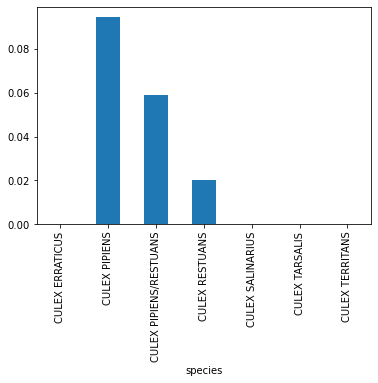

In [4]:
train_1.groupby('species')['wnvpresent'].mean().plot.bar()

<AxesSubplot:xlabel='date'>

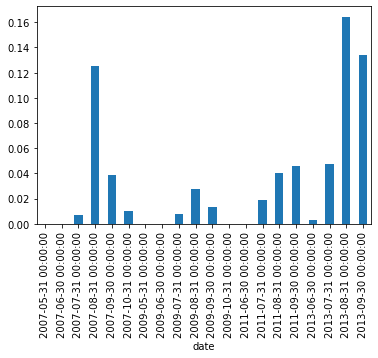

In [237]:
train_1.resample('M').mean().dropna()['wnvpresent'].plot.bar()

# Code to transform train data

In [6]:
# Standardise column names

new_col_names = [x.lower() for x in list(train.columns)]
train.columns = new_col_names

# To merge rows if they have the same date, location, trap

col_w = list(train.columns)
col_w.remove('nummosquitos')
col_w.remove('wnvpresent') # ie all columns except wnvpresent and nummosquitos
print(col_w)

train_1 = train.groupby(col_w).sum() # collapse rows that have same values in columns col_w
train_1.reset_index(inplace=True)    # create new df from those collapsed rows


# Create a new column for to indicate if it has wnv

train_1['wnv_binary'] = train_1['wnvpresent'].map(lambda x: 1 if x > 0 else 0)
train_1[['wnvpresent', 'wnv_binary']].groupby('wnvpresent').sum()

train_1.rename(columns={'wnvpresent': 'wnvcount', # Rename column names to the appropriate one
                       'wnv_binary': 'wnvpresent'}, inplace=True)


train_1['date'] = pd.to_datetime(train_1['date']) # convert date type
train_1['date_col'] = train_1['date']             # create another column of date

# Set Date to be in the index

train_1.set_index('date', inplace=True)           # set date to be index

['date', 'address', 'species', 'block', 'street', 'trap', 'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy']


In [53]:
col_w

['date',
 'address',
 'species',
 'block',
 'street',
 'trap',
 'addressnumberandstreet',
 'latitude',
 'longitude',
 'addressaccuracy',
 'nummosquitos',
 'wnvpresent']

## Still under maintenance

In [227]:
mon_label = ['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']

In [ ]:
fig, axes = plt.subplots(
    nrows=4,
    figsize=(15,12))
axes[0].bar(mon_label,train_1.loc['2007'].resample('M').mean().dropna()['wnvpresent'])        # all years
axes[1].bar(mon_label,train_1.loc['2009'].resample('M').mean().dropna()['wnvpresent']) # stationarity
axes[2].bar(mon_label,train_1.loc['2011'].resample('M').mean().dropna()['wnvpresent'])
axes[3].bar(mon_label,train_1.loc['2013'].resample('M').mean().dropna()['wnvpresent'])

In [220]:
train_1.resample('Y').mean().dropna()['wnvpresent'][0]

0.0681081081081081

In [229]:
train_1.resample('M').mean().dropna()['wnvpresent']

date
2007-05-31    0.000000
2007-06-30    0.000000
2007-07-31    0.006565
2007-08-31    0.125592
2007-09-30    0.038402
2007-10-31    0.009950
2009-05-31    0.000000
2009-06-30    0.000000
2009-07-31    0.008052
2009-08-31    0.027692
2009-09-30    0.013123
2009-10-31    0.000000
2011-06-30    0.000000
2011-07-31    0.018904
2011-08-31    0.040179
2011-09-30    0.045643
2013-06-30    0.002639
2013-07-31    0.047035
2013-08-31    0.164557
2013-09-30    0.133949
Name: wnvpresent, dtype: float64

In [230]:
train_1.loc['2011'].resample('M').mean().dropna()['wnvpresent']

date
2011-06-30    0.000000
2011-07-31    0.018904
2011-08-31    0.040179
2011-09-30    0.045643
Freq: M, Name: wnvpresent, dtype: float64